In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# データ読み込み（例：ETTm1）
df = pd.read_csv("../data/ETTm1.csv")

# datetime 化
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

In [ ]:
print(df.head())
print(df.tail())
print(df.info())
df.describe()

                 date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999
2 2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000
3 2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000
4 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
                     date    HUFL   HULL   MUFL   MULL   LUFL   LULL     OT
69675 2018-06-26 18:45:00   9.310  3.550  5.437  1.670  3.868  1.462  9.567
69676 2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462  9.567
69677 2018-06-26 19:15:00  10.784  3.349  7.000  1.635  3.746  1.432  9.426
69678 2018-06-26 19:30:00  11.655  3.617  7.533  1.706  4.173  1.523  9.426
69679 2018-06-26 19:45:00  12.994  3.818  8.244  1.777  4.721  1.523  9.778
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (tota

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,69680,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000
mean,2017-06-28 21:52:30,7.413993,2.261418,4.322226,0.896509,3.082888,0.857907,13.320642
min,2016-07-01 00:00:00,-23.242001,-5.693000,-26.367001,-6.041000,-1.188000,-1.371000,-4.221000
25%,2016-12-29 10:56:15,5.827000,0.804000,3.305000,-0.284000,2.315000,0.670000,6.964000
50%,2017-06-28 21:52:30,8.841000,2.210000,6.005000,0.959000,2.833000,0.975000,11.396000
75%,2017-12-27 08:48:45,11.788000,3.684000,8.635000,2.203000,3.655000,1.218000,18.079000
max,2018-06-26 19:45:00,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000
std,NaN,7.082928,2.041293,6.829189,1.807239,1.174063,0.600440,8.564817


In [ ]:
df.isna().sum()

,0
date,0
HUFL,0
HULL,0
MUFL,0
MULL,0
LUFL,0
LULL,0
OT,0


In [ ]:
print("開始:", df["date"].min())
print("終了:", df["date"].max())
print("データ数:", len(df))

開始: 2016-07-01 00:00:00
終了: 2018-06-26 19:45:00
データ数: 69680


In [ ]:
df["date"].diff().value_counts().head()

,count
date,
0 days 00:15:00,69679


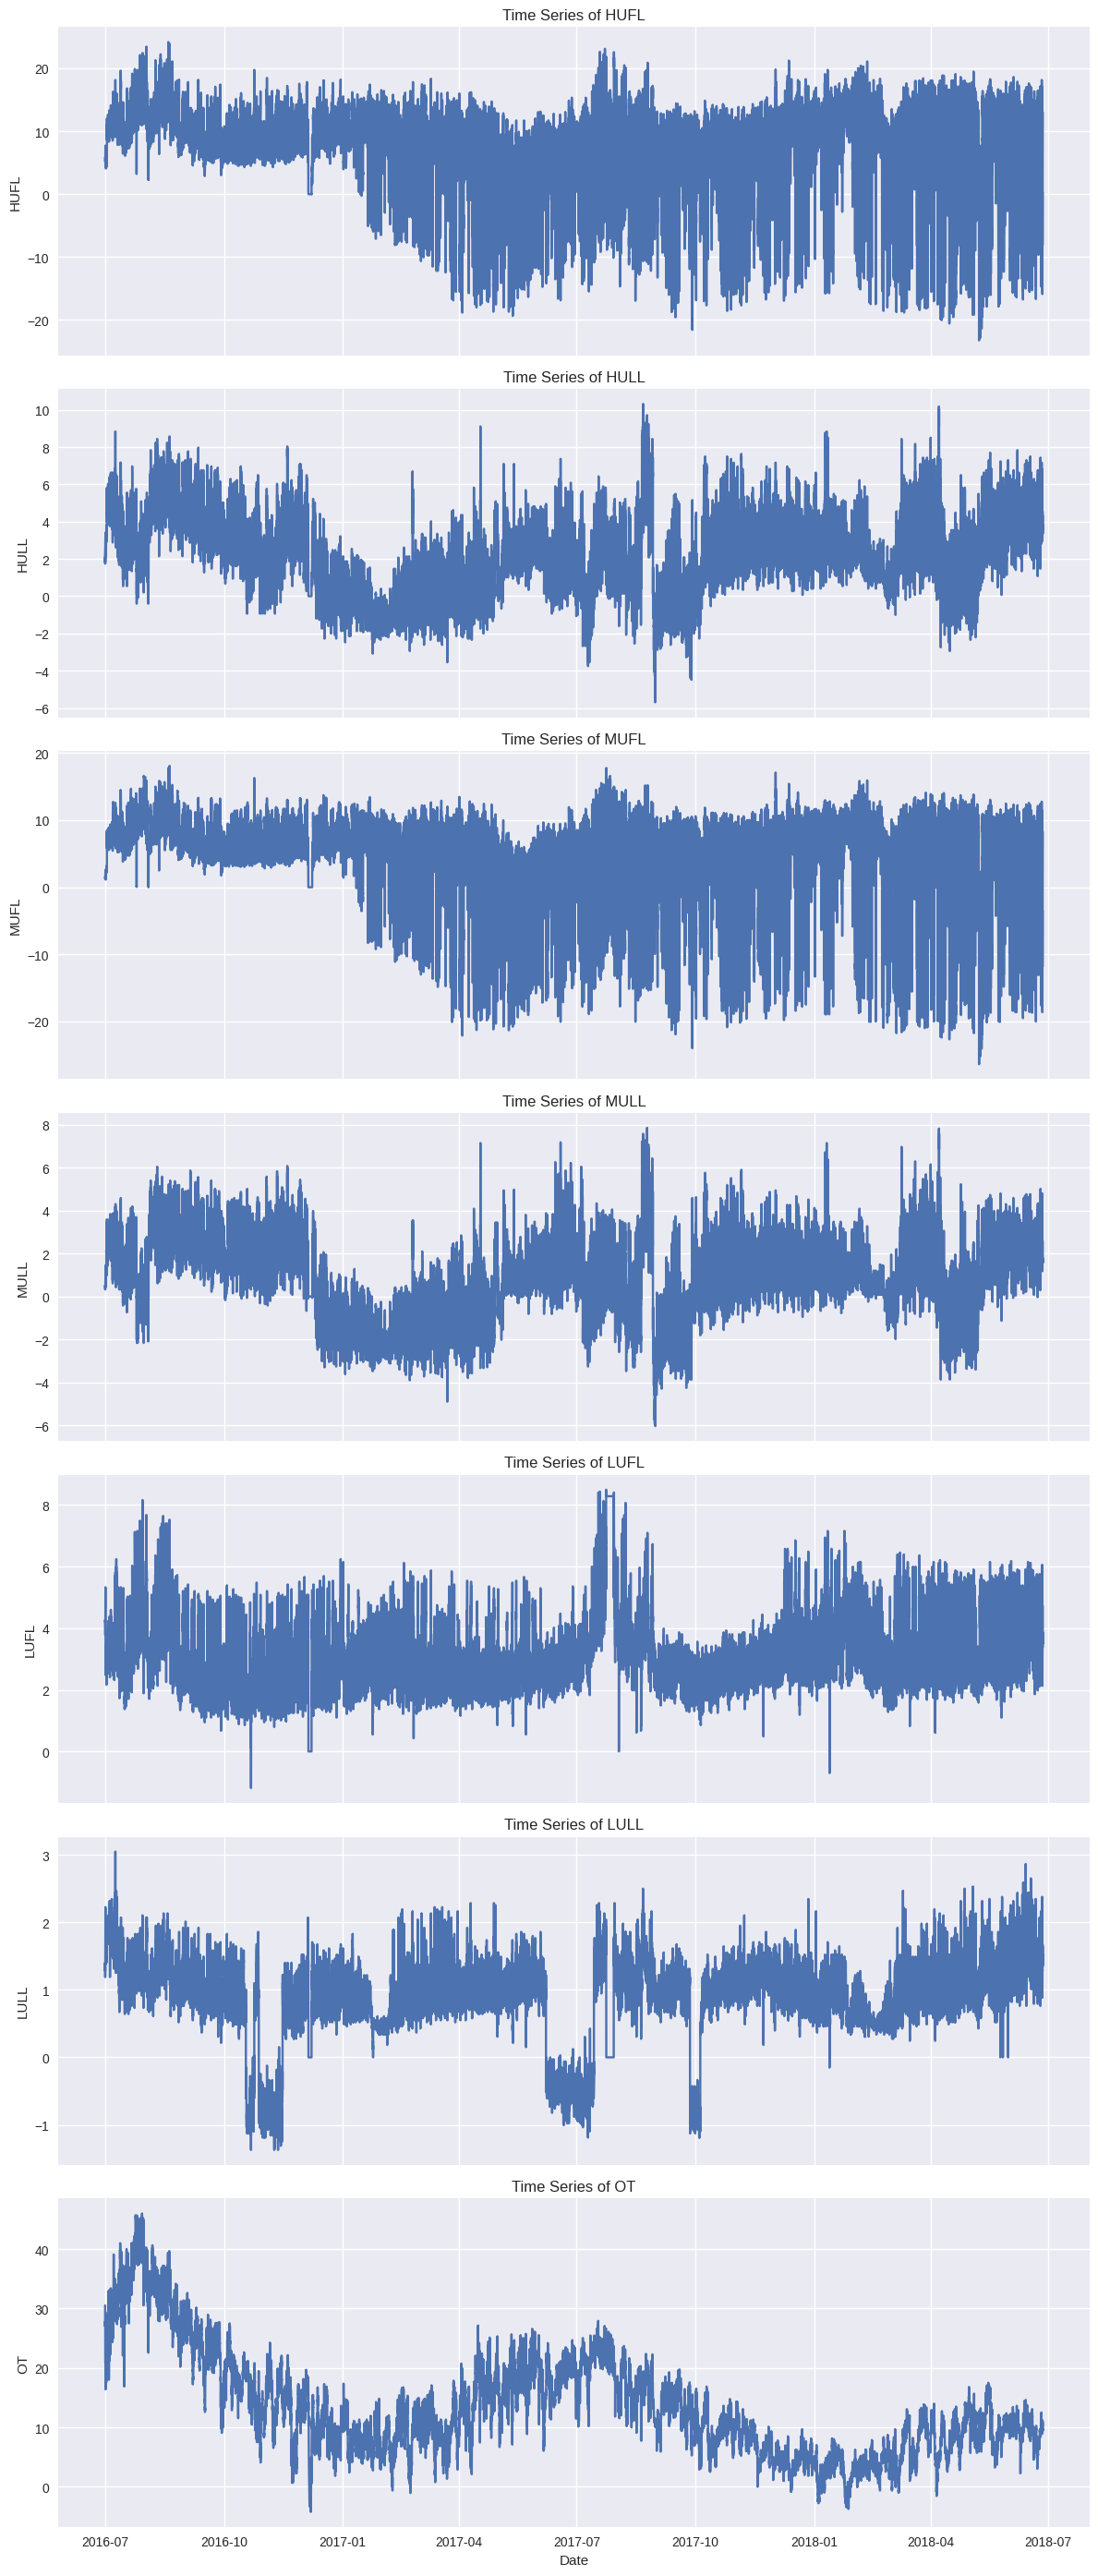

In [ ]:
features = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]


fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 4 * len(features)), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(df['date'], df[feature])
    axes[i].set_title(f'Time Series of {feature}')
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

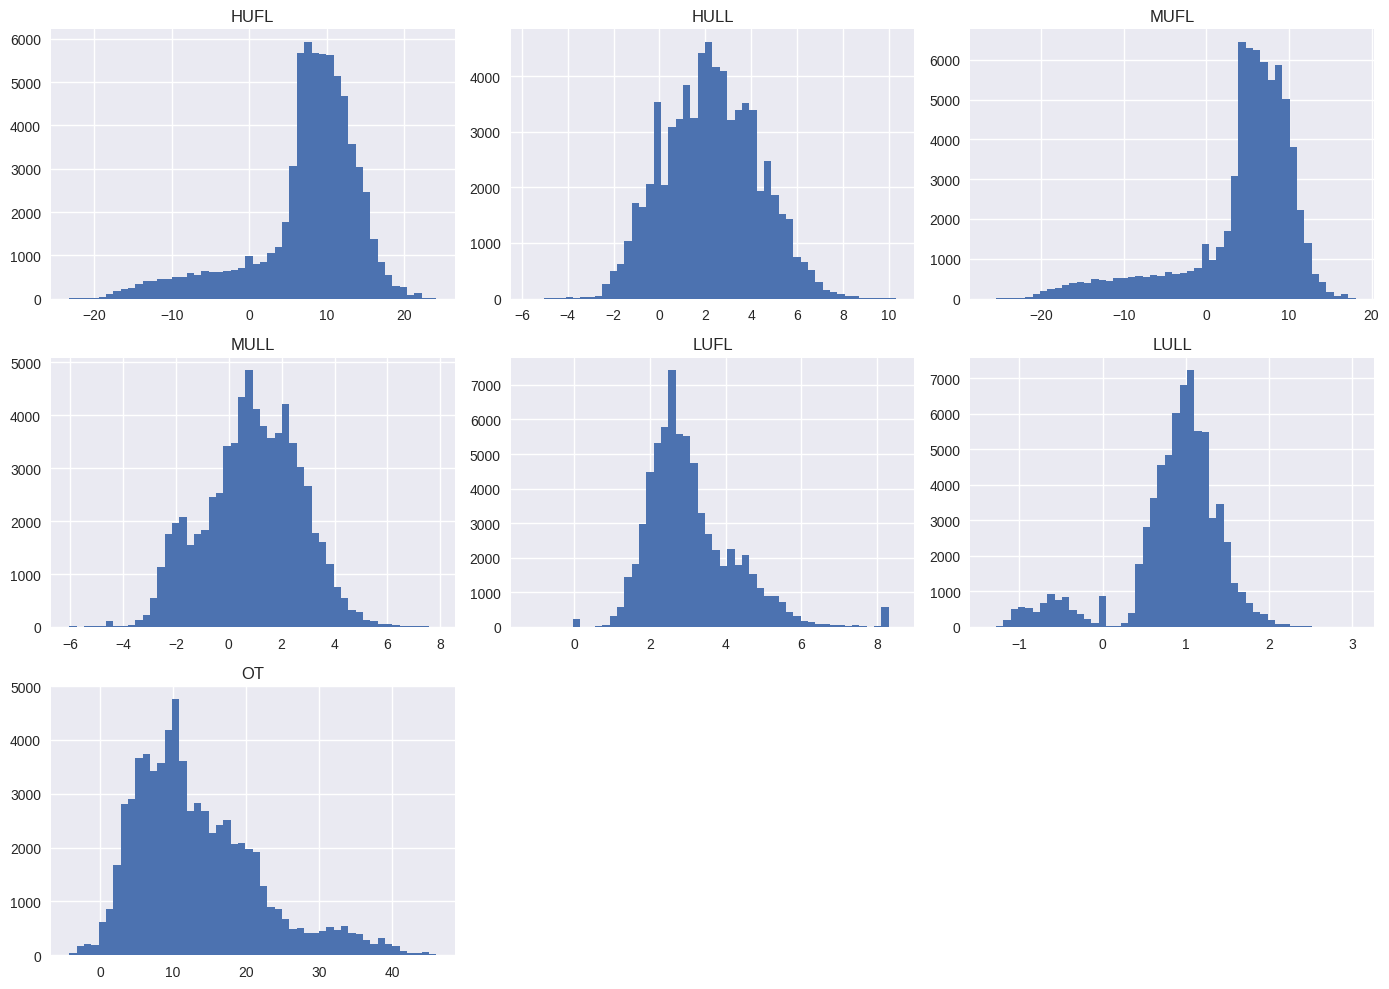

In [ ]:
df[features].hist(
    bins=50,
    figsize=(14, 10),
    layout=(3, 3)
)
plt.tight_layout()
plt.show()

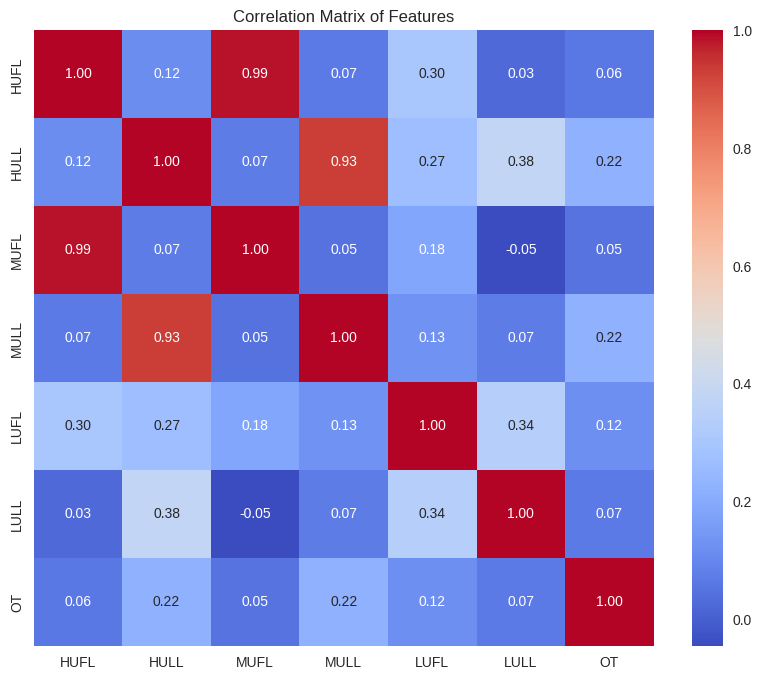

In [ ]:
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

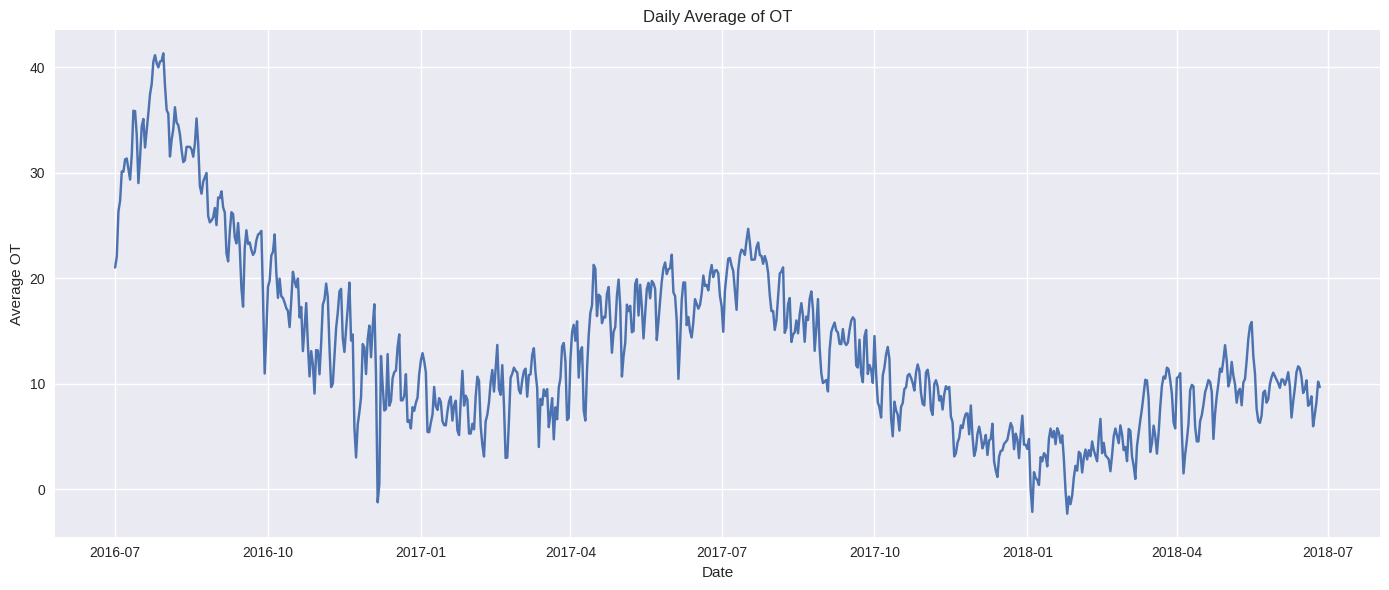

In [ ]:
daily_avg_ot = df.set_index('date')['OT'].resample('D').mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_avg_ot.index, daily_avg_ot.values)
plt.title('Daily Average of OT')
plt.xlabel('Date')
plt.ylabel('Average OT')
plt.grid(True)
plt.tight_layout()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2963838382.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Average Oil Temperature ($^\circ$C)', fontsize=14)


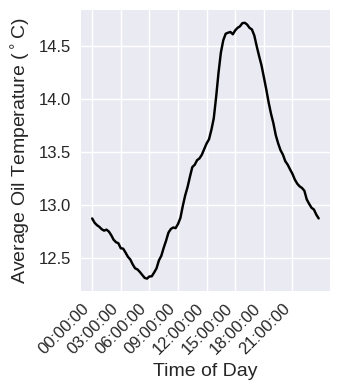

In [ ]:
df['time_of_day'] = df['date'].dt.time

average_ot_by_time = df.groupby('time_of_day')['OT'].mean().reset_index()

plt.figure(figsize=(3.5, 4))
plt.plot(average_ot_by_time['time_of_day'].astype(str),
         average_ot_by_time['OT'], color='black')

# 軸ラベル文字サイズ
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average Oil Temperature ($^\circ$C)', fontsize=14)

ax = plt.gca()

# 目盛り間引き
ticks = ax.get_xticks()
ax.set_xticks(ticks[::12])

# 目盛り文字サイズ
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Drop the auxiliary column after use to keep the DataFrame clean
df = df.drop(columns=['time_of_day'], errors='ignore')

In [ ]:
df['date_only'] = df['date'].dt.date
daily_max_min = (
    df.groupby('date_only')['OT']
      .agg(['max', 'min'])
      .reset_index()
)
daily_max_min['daily_range'] = (
    daily_max_min['max'] - daily_max_min['min']
)
range_mean = daily_max_min['daily_range'].mean()
range_variance = daily_max_min['daily_range'].var()
range_std = daily_max_min['daily_range'].std()

print("日内の最高:", daily_max_min['max'].mean())
print("日内の最低:", daily_max_min['min'].mean())
print("日内差の平均:", range_mean)
print("日内差の分散:", range_variance)
print("日内差の標準偏差:", range_std)

日内の最高: 16.17652621068902
日内の最低: 10.508925641535399
日内差の平均: 5.66760056915362
日内差の分散: 6.888150107786131
日内差の標準偏差: 2.624528549622985


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2062314266.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Daily OT Range ($^\circ$C)', fontsize=14)


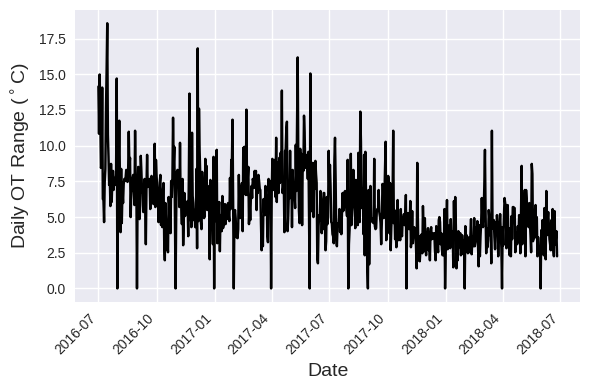

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(
    daily_max_min['date_only'],
    daily_max_min['daily_range'],
    color='black'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily OT Range ($^\circ$C)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

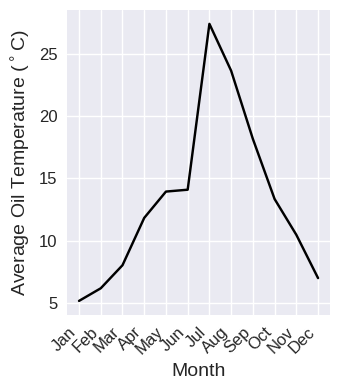

In [ ]:
df['month'] = df['date'].dt.month

average_ot_by_month = (
    df.groupby('month')['OT']
      .mean()
      .reset_index()
)

plt.figure(figsize=(3.5, 4))

# 線（黒・markerなし）
plt.plot(average_ot_by_month['month'],
         average_ot_by_month['OT'],
         color='black')

# 軸ラベル（同じサイズ・表記）
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Oil Temperature ($^\\circ$C)', fontsize=14)

ax = plt.gca()

# x目盛り（1〜12）
ax.set_xticks(range(1, 13))
ax.set_xticklabels(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# 目盛り文字サイズ
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 傾き（time_of_day に合わせて付けるなら）
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 後処理
df = df.drop(columns=['month'], errors='ignore')

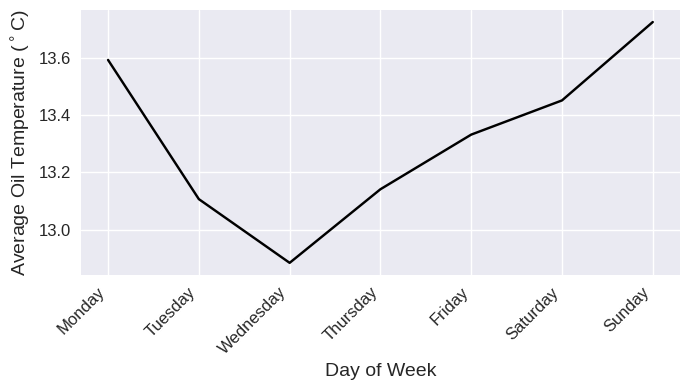

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

average_ot_by_day_of_week = (
    df.groupby('day_of_week')['OT']
      .mean()
      .reindex(day_order)
)

plt.figure(figsize=(7, 4))

# 線（黒・markerなし）
plt.plot(average_ot_by_day_of_week.index,
         average_ot_by_day_of_week.values,
         color='black')

# 軸ラベル（統一）
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Oil Temperature ($^\\circ$C)', fontsize=14)

ax = plt.gca()

# 目盛り文字サイズ
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# ラベル回転
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 後処理
df = df.drop(columns=['day_of_week'], errors='ignore')

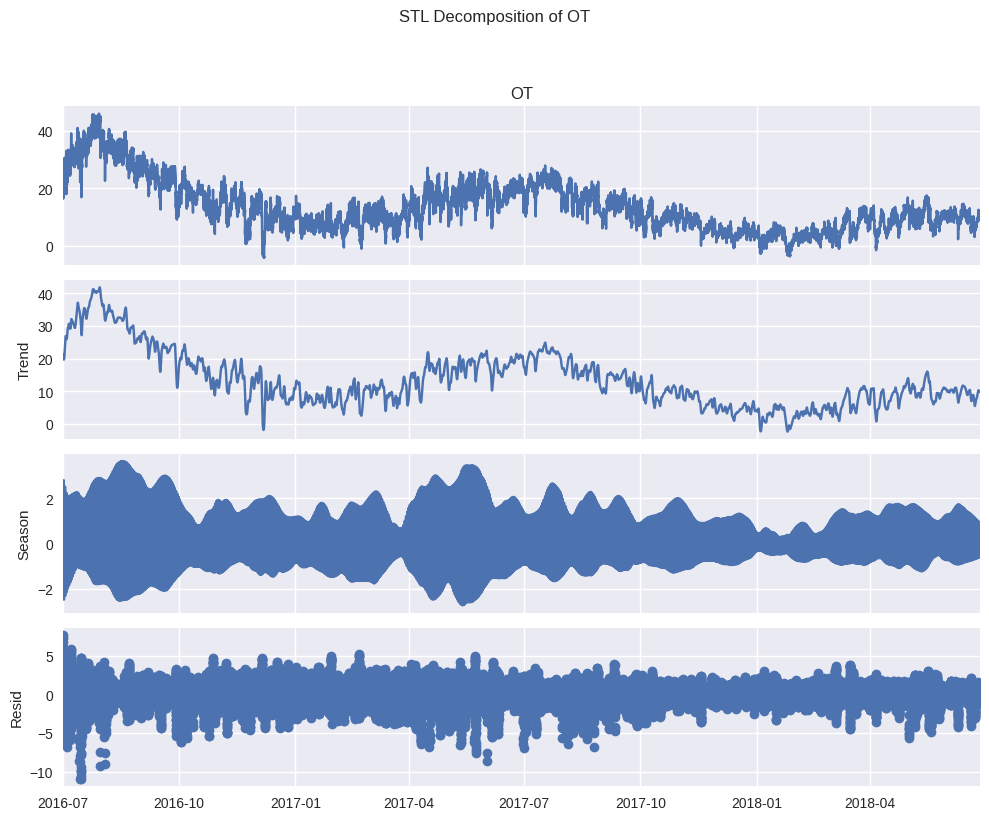

In [ ]:
from statsmodels.tsa.seasonal import STL

# Create a time series from the 'OT' column, setting 'date' as the index
ts = df.set_index('date')['OT']

# Define the period for daily seasonality (15-minute data: 24 hours * 4 quarters/hour = 96 observations per day)
period = 96

# Perform STL decomposition
# The 'seasonal' parameter (s_window) controls the smoothness of the seasonal component. It must be an odd integer.
# A value of 25 is often a good starting point for capturing daily patterns in sub-hourly data.
res = STL(ts, period=period, seasonal=25).fit()

# Plot the decomposed components
fig = res.plot()
fig.set_size_inches(10, 8)
plt.suptitle('STL Decomposition of OT', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

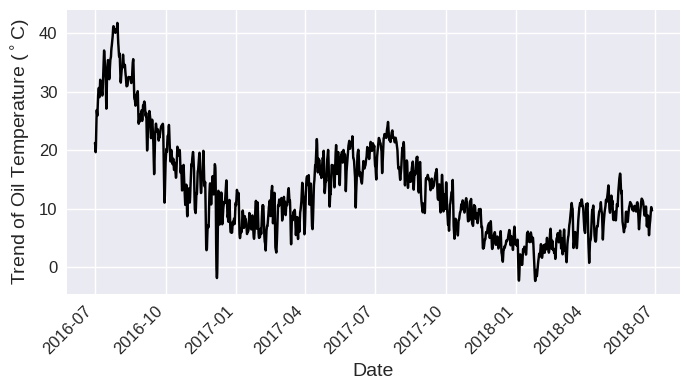

In [ ]:
# ---- Trend だけ取得 ----
trend = res.trend

# ---- Plot（体裁統一）----
plt.figure(figsize=(7, 4))

plt.plot(trend.index,
         trend.values,
         color='black')

# 軸ラベル
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trend of Oil Temperature ($^\\circ$C)', fontsize=14)

ax = plt.gca()

# 目盛り文字サイズ
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# xラベル回転（datetimeなので）
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

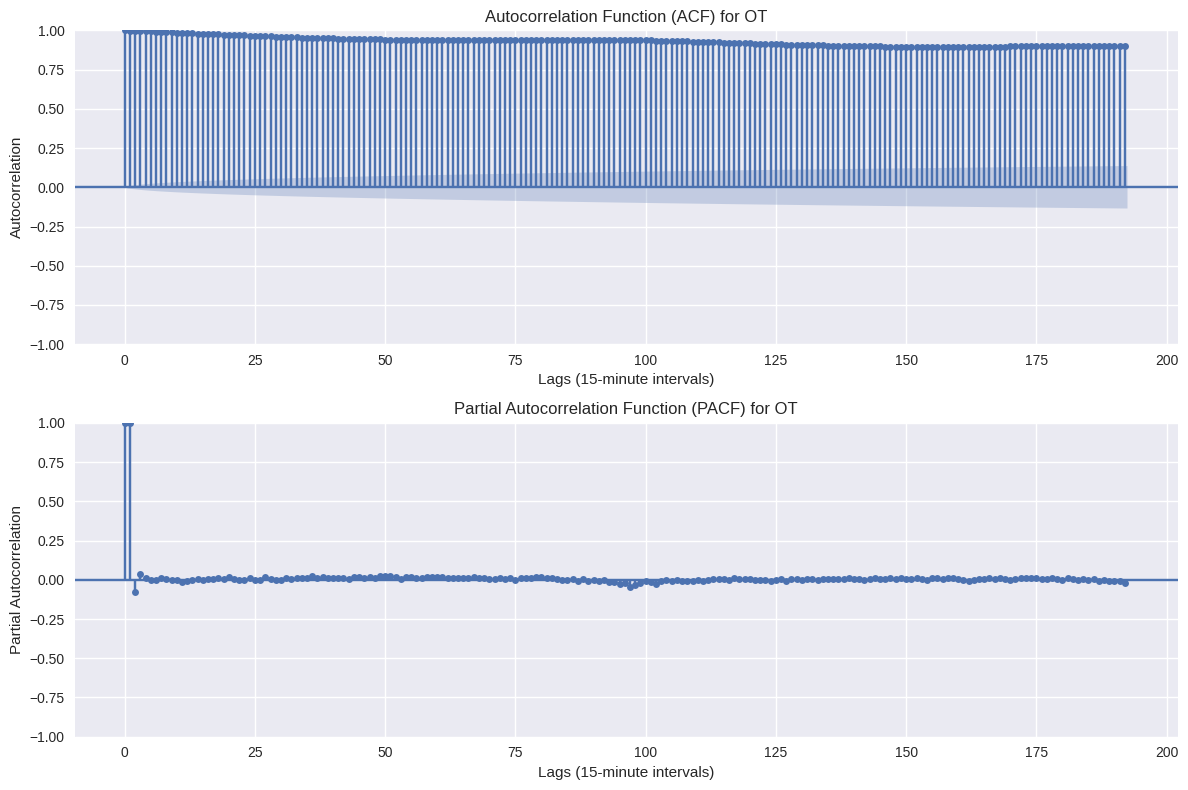

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a time series from the 'OT' column, setting 'date' as the index
ts = df.set_index('date')['OT']

# Plot ACF
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(ts, lags=96*2, ax=axes[0], title='Autocorrelation Function (ACF) for OT') # Lags for two days (2*96 intervals)
axes[0].set_xlabel('Lags (15-minute intervals)')
axes[0].set_ylabel('Autocorrelation')

# Plot PACF
plot_pacf(ts, lags=96*2, ax=axes[1], title='Partial Autocorrelation Function (PACF) for OT') # Lags for two days
axes[1].set_xlabel('Lags (15-minute intervals)')
axes[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

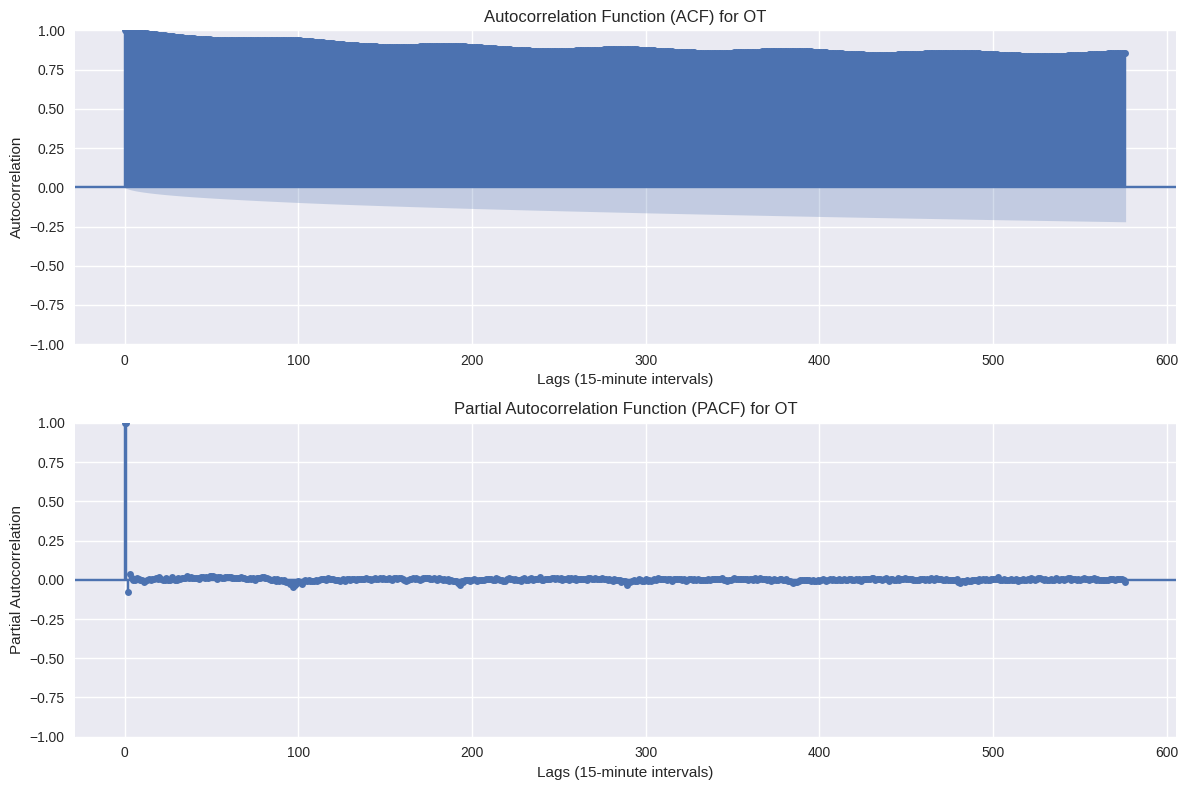

In [ ]:
# Create a time series from the 'OT' column, setting 'date' as the index
ts = df.set_index('date')['OT']

# Plot ACF
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(ts, lags=96*6, ax=axes[0], title='Autocorrelation Function (ACF) for OT') # Lags for two days (2*96 intervals)
axes[0].set_xlabel('Lags (15-minute intervals)')
axes[0].set_ylabel('Autocorrelation')

# Plot PACF
plot_pacf(ts, lags=96*6, ax=axes[1], title='Partial Autocorrelation Function (PACF) for OT') # Lags for two days
axes[1].set_xlabel('Lags (15-minute intervals)')
axes[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

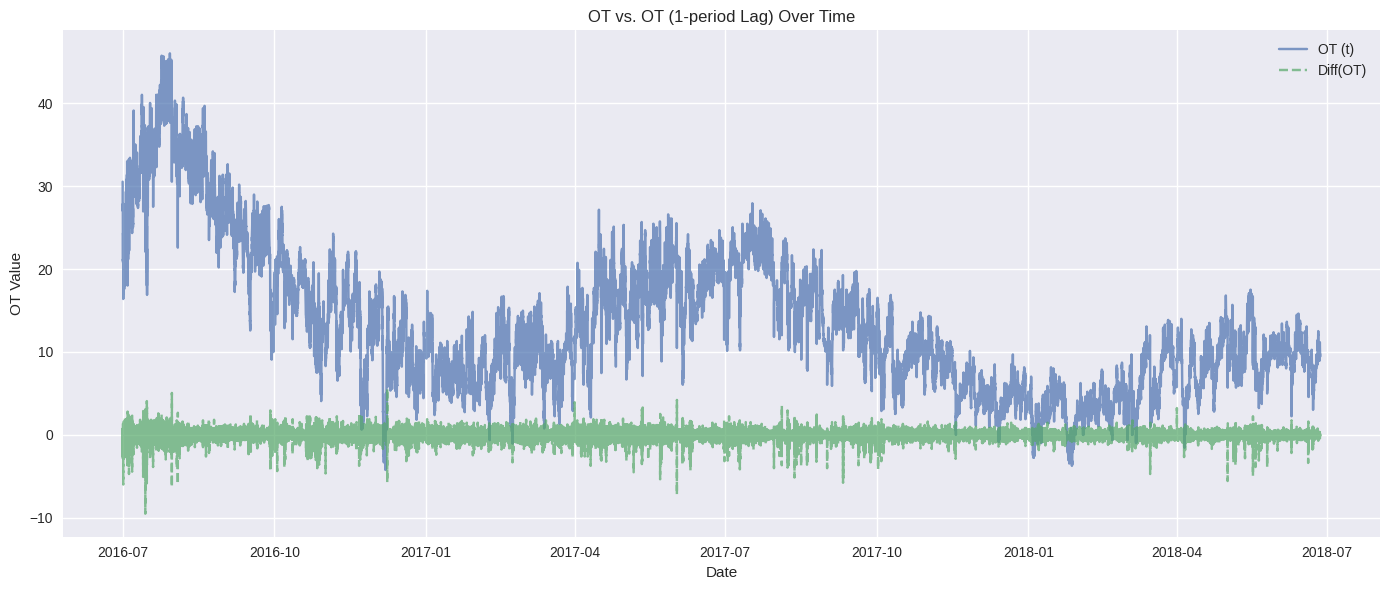

In [ ]:
# Create a 1-period lagged 'OT' column
df['OT_lag1'] = df['OT'].shift(1)
diff = df['OT'] - df['OT_lag1']

# Plot the original and lagged 'OT' columns

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['OT'], label='OT (t)', alpha=0.7)
plt.plot(df['date'], diff, label='Diff(OT)', alpha=0.7, linestyle='--')
plt.title('OT vs. OT (1-period Lag) Over Time')
plt.xlabel('Date')
plt.ylabel('OT Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Drop the auxiliary column after use to keep the DataFrame clean
df = df.drop(columns=['OT_lag1'], errors='ignore')

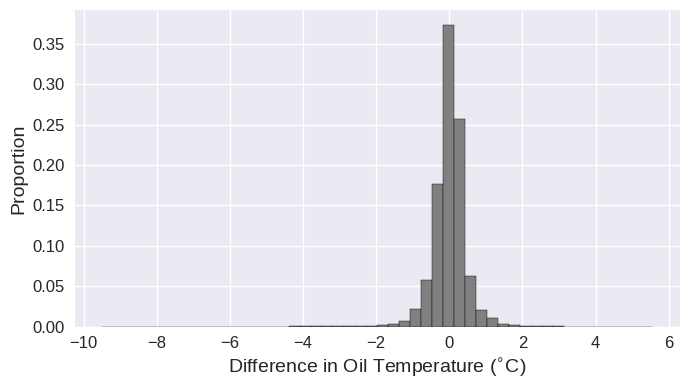

Mean of Diff: -0.0003
Standard Deviation of Diff: 0.4454


In [ ]:
plt.figure(figsize=(7, 4))

plt.hist(diff.dropna(),
         bins=50,
         edgecolor='black',
         color='grey',
         weights=np.ones_like(diff.dropna()) / len(diff.dropna())) # Changed to weights for proportion

# 軸ラベル（統一）
plt.xlabel(r'Difference in Oil Temperature ($^{\circ}$C)', fontsize=14)
plt.ylabel('Proportion', fontsize=14) # Updated label for proportion

ax = plt.gca()

# 目盛り文字サイズ
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

# 統計量表示
print(f"Mean of Diff: {diff.mean():.4f}")
print(f"Standard Deviation of Diff: {diff.std():.4f}")

# 後処理
df = df.drop(columns=['OT_lag1'], errors='ignore')

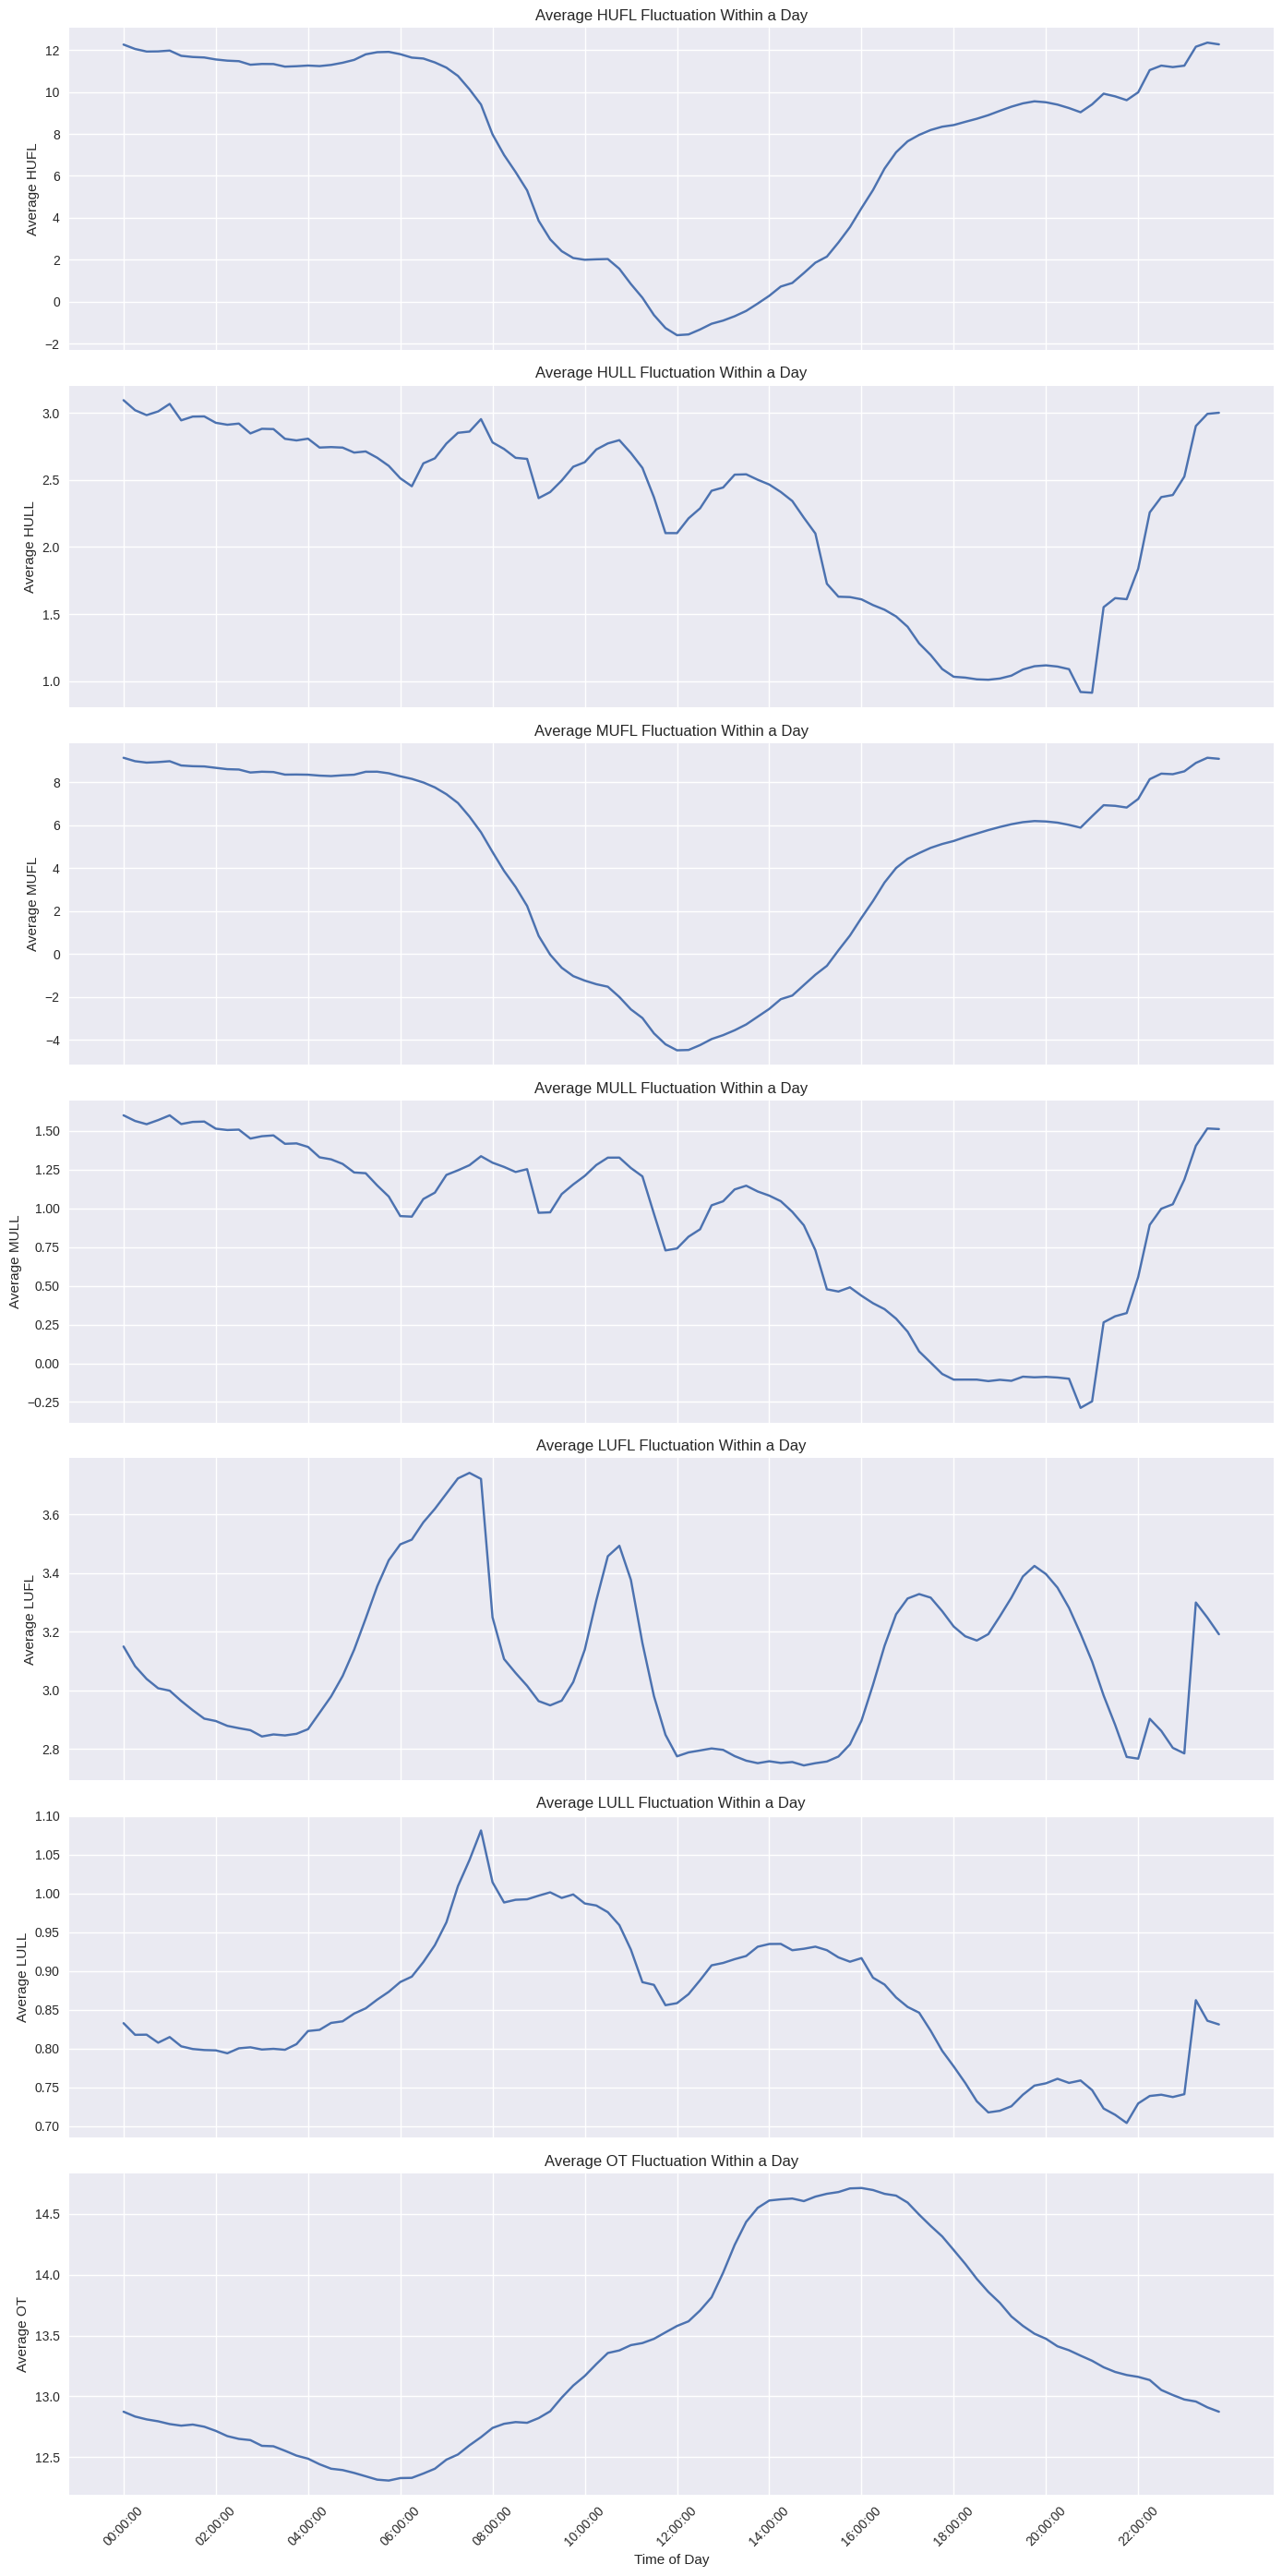

In [ ]:
df['time_of_day'] = df['date'].dt.time

features = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(14, 4 * len(features)), sharex=True)

for i, feature in enumerate(features):
    average_feature_by_time = df.groupby('time_of_day')[feature].mean().reset_index()
    axes[i].plot(average_feature_by_time['time_of_day'].astype(str), average_feature_by_time[feature])
    axes[i].set_title(f'Average {feature} Fluctuation Within a Day')
    axes[i].set_ylabel(f'Average {feature}')
    axes[i].grid(True)
    if i == len(features) - 1:
        axes[i].set_xlabel('Time of Day')
        axes[i].set_xticks(axes[i].get_xticks()[::8]) # Show fewer x-ticks for readability
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_xlabel('') # Only show x-label on the last plot

plt.tight_layout()
plt.show()

df = df.drop(columns=['time_of_day'], errors='ignore')